In [1]:
from sympy import *
from sympy.physics.mechanics import * 
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp


init_vprinting()


In [276]:
g, m1, m2, m3, ell1, ell2, ell3, t = symbols('g m1 m2 m3 ell1 ell2 ell3 t')
theta1, theta2, theta3 = dynamicsymbols('theta1 theta2 theta3')

xm1 = ell1*sin(theta1)
ym1 = - ell1*cos(theta1)

xm2 = ell1*sin(theta1) + ell2*sin(theta2)
ym2 = - ell1*cos(theta1) - ell2*cos(theta2)

xm3 = ell1*sin(theta1) + ell2*sin(theta2) + ell3*sin(theta3)
ym3 = - ell1*cos(theta1) - ell2*cos(theta2) - ell3*cos(theta3)



# time derivatives
xm1_dot = diff(xm1, t)
ym1_dot = diff(ym1, t)

xm2_dot = diff(xm2, t)
ym2_dot = diff(ym2, t)

xm3_dot = diff(xm3, t)
ym3_dot = diff(ym3, t)

theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1_dot, t)

theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2_dot, t)

theta3_dot = diff(theta3, t)
theta3_ddot = diff(theta3_dot, t)


#Defining kinetic energy
T = 1/2 * m1 * (xm1_dot**2 + ym1_dot**2) + 1/2 * m2 * (xm2_dot**2 + ym2_dot **2) + 1/2 * m3 * (xm3_dot**2 + ym3_dot **2)

#Defining potential energy   m*g*h = m * g * y
V = m1 * g * ym1 + m2 * g * ym2 + m3 * g * ym3

#Lagrangian
L = T - V 

eqn1 = diff(diff(L, theta1_dot), t) - diff(L, theta1)
eqn2 = diff(diff(L, theta2_dot), t) - diff(L, theta2)
eqn3 = diff(diff(L, theta3_dot), t) - diff(L, theta3)

sln1 = simplify(solve(eqn1, theta1_ddot)[0])
sln2 = simplify(solve(eqn2, theta2_ddot)[0])
sln3 = simplify(solve(eqn3, theta3_ddot)[0])


x = Matrix([theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot])
x_dot = diff(x, t)


Eq(x_dot, Matrix([theta1_dot, sln1, theta2_dot, sln2, theta3_dot, sln3]))




       ⎡                                                                      
       ⎢                                                                      
       ⎢ ⎛                       2                                            
       ⎢-⎝ell₂⋅m₂⋅sin(θ₁ - θ₂)⋅θ₂̇  + ell₂⋅m₂⋅cos(θ₁ - θ₂)⋅θ₂̈ + ell₂⋅m₃⋅sin(θ
       ⎢──────────────────────────────────────────────────────────────────────
⎡θ₁̇⎤   ⎢                                                                     
⎢  ⎥   ⎢                                                                      
⎢θ₁̈⎥   ⎢                                                                     
⎢  ⎥   ⎢                                                                      
⎢θ₂̇⎥   ⎢                                2                                    
⎢  ⎥ = ⎢         ell₁⋅m₂⋅sin(θ₁ - θ₂)⋅θ₁̇  - ell₁⋅m₂⋅cos(θ₁ - θ₂)⋅θ₁̈ + ell₁⋅m
⎢θ₂̈⎥   ⎢         ────────────────────────────────────────────────────────────
⎢  ⎥   ⎢                                            

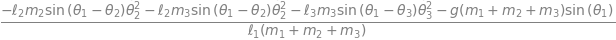

In [277]:
sln1_corrected = -(ell2*m2*sin(theta1 - theta2)*theta2_dot**2 + ell2*m3*sin(theta1-theta2)*theta2_dot**2 + ell3*m3*sin(theta1-theta3)*theta3_dot**2+ g*(m1+m2+m3)*sin(theta1))/(ell1*(m1+m2+m3))
sln2_corrected = (ell1*m2*sin(theta1-theta2)*theta1_dot**2 + ell1*m3*sin(theta1-theta2)*theta1_dot**2 - ell3*m3*sin(theta2-theta3)*theta3_dot**2 - g*(m2+m3)*sin(theta2))/(ell2*(m2+m3))
sln3_corrected = (ell1*sin(theta1-theta3)*theta1_dot**2 + ell2*sin(theta2-theta3)*theta2_dot**2-g*sin(theta3))/ell3
sln1_corrected


In [278]:
correction_matrix = Matrix([[1,0,0,0,0,0],
                            [0,1,0,(m2+m3)*ell2*cos(theta1-theta2)/(ell1*(m1+m2+m3)), 0, ell3*m3*cos(theta1 - theta2)/(ell1*(m1+m2+m3))],
                            [0,0,1,0,0,0],
                            [0, ell1*(m2+m3)*cos(theta1-theta2)/(ell2*(m2+m3)), 0, 1, 0, ell3*m3*cos(theta2-theta3)/(ell2*(m2+m3))],
                            [0,0,0,0,1,0],
                            [0, ell1*cos(theta1-theta3)/ell3, 0, ell2*cos(theta2-theta3)/ell3, 0, 1]])
correction_matrix

⎡1          0          0               0               0           0          
⎢                                                                             
⎢                         ell₂⋅(m₂ + m₃)⋅cos(θ₁ - θ₂)     ell₃⋅m₃⋅cos(θ₁ - θ₂)
⎢0          1          0  ───────────────────────────  0  ────────────────────
⎢                             ell₁⋅(m₁ + m₂ + m₃)         ell₁⋅(m₁ + m₂ + m₃) 
⎢                                                                             
⎢0          0          1               0               0           0          
⎢                                                                             
⎢   ell₁⋅cos(θ₁ - θ₂)                                     ell₃⋅m₃⋅cos(θ₂ - θ₃)
⎢0  ─────────────────  0               1               0  ────────────────────
⎢          ell₂                                              ell₂⋅(m₂ + m₃)   
⎢                                                                             
⎢0          0          0               0            

In [279]:
correction_matrix_inv = correction_matrix.inv()
correction_matrix_inv

⎡1                                                                            
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢0                                            ────────────────────────────────
⎢                                                              2              
⎢                                             m₁⋅m₂ - m₁⋅m₃⋅cos (θ₂ - θ₃) + m₁
⎢                                                                             
⎢0                                                                            
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢0  ────────────────────────────────────────────────

In [282]:
A = Matrix([theta1_dot, sln1_corrected, theta2_dot, sln2_corrected, theta3_dot, sln3_corrected])
A

ODE_equations = correction_matrix_inv * A
ODE_equations

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢     ⎛                           2                                2    2     
⎢ell₃⋅⎝ell₁⋅m₁⋅m₂ - ell₁⋅m₁⋅m₃⋅cos (θ₂ - θ₃) + ell₁⋅m₁⋅m₃ - ell₁⋅m₂ ⋅cos (θ₁ -
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢───────────────────────────────────────────────────

In [112]:
g, m1, m2, m3, ell1, ell2, ell3, t = symbols('g m1 m2 m3 ell1 ell2 ell3 t')
theta1, theta2, theta3 = dynamicsymbols('theta1 theta2 theta3')
theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1_dot, t)

theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2_dot, t)

theta3_dot = diff(theta3, t)
theta3_ddot = diff(theta3_dot, t)


ode_theta1_ddot = lambdify((g, m1, m2, m3, ell1, ell2, ell3, theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot), ODE_equations[1], "numpy")
ode_theta2_ddot = lambdify((g, m1, m2, m3, ell1, ell2, ell3, theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot), ODE_equations[3], "numpy")
ode_theta3_ddot = lambdify((g, m1, m2, m3, ell1, ell2, ell3, theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot), ODE_equations[5], "numpy")

In [285]:
g = 9.81
ell1 = 1
ell2 = 1
ell3 = 1
m1 = 1
m2 = 1
m3 = 1


def tripple_pendelum_ODE(t, y):

   theta1 = y[0]
   theta1_dot = y[1]
   theta2 = y[2]
   theta2_dot = y[3]
   theta3 = y[4]
   theta3_dot = y[5]

   # theta1_dd = m2*(ell1*sin(theta1 - theta2)*theta1_dot**2 - g*sin(theta2))*cos(theta1 - theta2)/(ell1*m1 + ell1*m2*cos(theta1 - theta2)**2 + ell1*m2) + (-ell2*m2*sin(theta1 - theta2)*theta2_dot**2 + g*m1*sin(theta1) + g*m2*sin(theta1))/(ell1*(m1 + m2*cos(theta1 - theta2)**2 + m2))
   theta1_dd = ode_theta1_ddot(g, m1, m2, m3, ell1, ell2, ell3, theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot)
   
   # theta2_dd = (m1 + m2)*(ell1*sin(theta1 - theta2)*theta1_dot**2 - g*sin(theta2))/(ell2*(m1 + m2*cos(theta1 - theta2)**2 + m2)) + (-ell1*m1*cos(theta1 - theta2) - ell1*m2*cos(theta1 - theta2))*(-ell2*m2*sin(theta1 - theta2)*theta2_dot**2 + g*m1*sin(theta1) + g*m2*sin(theta1))/(ell1*(m1 + m2)*(ell2*m1 + ell2*m2*cos(theta1 - theta2)**2 + ell2*m2))
   theta2_dd = ode_theta2_ddot(g, m1, m2, m3, ell1, ell2, ell3, theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot)

   theta3_dd = ode_theta3_ddot(g, m1, m2, m3, ell1, ell2, ell3, theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot)


   return(theta1_dot, theta1_dd, theta2_dot, theta2_dd, theta3_dot, theta3_dd)

In [291]:
theta1_0 = np.deg2rad(45)
theta1_dot0 = 0
theta2_0 = np.deg2rad(-30)
theta2_dot0 = 0
theta3_0 = np.deg2rad(75)
theta3_dot0 = 0


theta1_dd = 0
theta2_dd = 0
theta3_dd = 0

t = 10
frames = np.linspace(0, t, 30*t)

#fikk chat til å skrive funksjonen basert på bildet over: 
time_points = np.linspace(0, 15, 6)  # 10 seconds, 30 frames per second
sol = solve_ivp(tripple_pendelum_ODE, [0, t], [theta1_0, theta1_dot0, theta2_0, theta2_dot0, theta3_0, theta3_dot0], t_eval=frames, method='Radau', atol=1e-11, rtol=1e-7)

theta1 = sol.y[0]
theta1_dot = sol.y[1]
theta2 = sol.y[2]
theta2_dot = sol.y[3]
theta3 = sol.y[4]
theta3_dot = sol.y[5]
t = sol.t

theta1_deg = np.rad2deg(sol.y[0])
theta2_deg = np.rad2deg(sol.y[2])
theta3_deg = np.rad2deg(sol.y[4])
theta1_dot_deg = np.rad2deg(sol.y[1])
theta2_dot_deg = np.rad2deg(sol.y[3])
theta3_dot_deg = np.rad2deg(sol.y[5])


np.savetxt('double_pend.csv', np.transpose([theta1_deg, theta1_dot_deg, theta2_deg, theta2_dot_deg, theta3_deg, theta3_dot_deg]), delimiter=',')


In [292]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.344e-02 ...  9.967e+00  1.000e+01]
        y: [[ 7.854e-01  7.809e-01 ...  2.960e-01  2.045e-01]
            [ 0.000e+00 -2.704e-01 ... -4.203e+00 -1.307e+00]
            ...
            [ 1.309e+00  1.309e+00 ...  8.081e+00  8.420e+00]
            [ 0.000e+00 -2.417e-02 ...  1.042e+01  9.662e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 19893
     njev: 90
      nlu: 966

In [45]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec


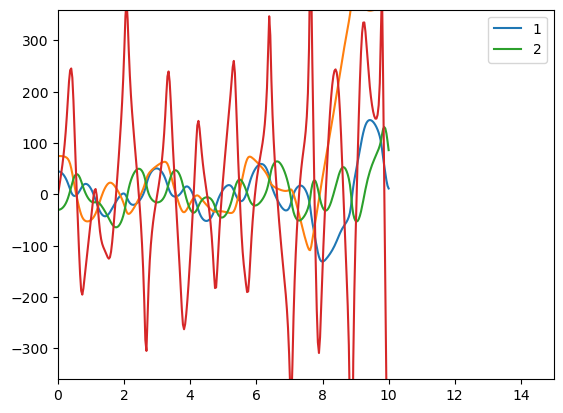

In [293]:
plt.plot(t, theta1_deg, label='1')
plt.plot(t, theta3_deg)
plt.plot(t, theta2_deg, label='2')
plt.plot(t, theta2_dot_deg)
plt.xlim(0,15)
plt.ylim(-360, 360)
plt.legend()


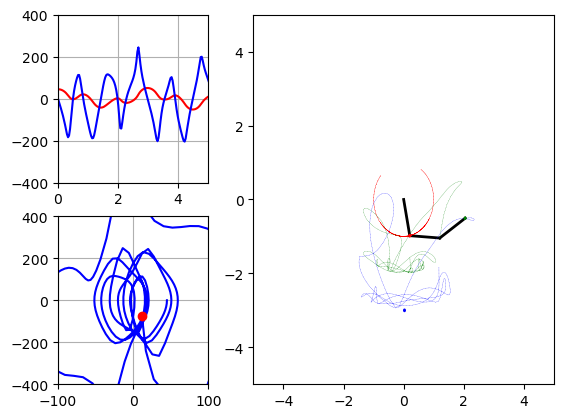

In [294]:
def pend_pos1(theta):
   theta1 = np.deg2rad(theta)
   return (ell1*np.sin(theta1), -ell1*np.cos(theta1))

def pend_pos2(theta1_deg, theta2_deg):
   theta1 = np.deg2rad(theta1_deg)
   theta2 = np.deg2rad(theta2_deg)
   return (ell1*np.sin(theta1) + ell2*np.sin(theta2), -ell1*np.cos(theta1) - ell2*np.cos(theta2))

def pend_pos3(theta1_deg, theta2_deg, theta3_deg):
   theta1 = np.deg2rad(theta1_deg)
   theta2 = np.deg2rad(theta2_deg)
   theta3 = np.deg2rad(theta3_deg)
   return (ell1*np.sin(theta1) + ell2*np.sin(theta2) + ell3*np.sin(theta3), -ell1*np.cos(theta1) - ell2*np.cos(theta2)- ell3*np.cos(theta3))


pos1x = []
pos1y = []
pos2x = []
pos2y = []
pos3x = []
pos3y = []


for i in range(len(t)):
   pos1x.append(pend_pos1(theta1_deg[i])[0])
   pos1y.append(pend_pos1(theta1_deg[i])[1])
   pos2x.append(pend_pos2(theta1_deg[i], theta2_deg[i])[0])
   pos2y.append(pend_pos2(theta1_deg[i], theta2_deg[i])[1])
   pos3x.append(pend_pos3(theta1_deg[i], theta2_deg[i], theta3_deg[i])[0])
   pos3y.append(pend_pos3(theta1_deg[i], theta2_deg[i], theta3_deg[i])[1])


fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])




ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

theta_curve, = ax0.plot(t[0], theta1_deg[0], 'r')
theta_dot_curve, = ax0.plot(t[0], theta1_dot_deg[0], 'b')

phase_curve, = ax1.plot(theta1_deg[0], theta1_dot_deg[0], 'b')
phase_dot, = ax1.plot(theta1_deg[0], theta1_dot_deg[0], 'ro')

x0, y0 = pend_pos1(theta1_0)
x0_2, y0_2 = pend_pos2(theta1_0, theta2_0)
x0_3, y0_3 = pend_pos3(theta1_0, theta2_0, theta3_0)

line, = ax2.plot([0, x0], [0, y0], lw=2, c = 'k')
circle =ax2.add_patch(plt.Circle(pend_pos1(theta1_0), m1*0.05, fc='r', zorder=3))
line2, = ax2.plot([x0, x0_2], [y0, y0_2], lw=2, c='k')
circle2 = ax2.add_patch(plt.Circle(pend_pos2(theta1_0, theta2_0), m2*0.05, fc='g', zorder=3))
circle3 = ax2.add_patch(plt.Circle(pend_pos3(theta1_0, theta2_0, theta3_0), m3*0.05, fc='b', zorder=3))
line3, = ax2.plot([x0_2, x0_3], [y0_2, y0_3], lw=2, c='k')
dot_curve, = ax2.plot(pend_pos1(theta1_0)[0], pend_pos1(theta1_0)[1] , lw = 0.2, c = 'r', linestyle='dashed')
dot_curve2, = ax2.plot(pend_pos2(theta1_0, theta2_0)[0], pend_pos2(theta1_0, theta2_0)[1], lw=0.2, c='g', linestyle='dashed')
dot_curve3, = ax2.plot(pend_pos3(theta1_0, theta2_0, theta3_0)[0], pend_pos3(theta1_0, theta2_0, theta3_0)[1], lw=0.2, c='b', linestyle='dashed')
                      

ax0.set_xlim(0,5)
ax0.set_ylim(-400,400)

ax1.set_xlim(-100, 100)
ax1.set_ylim(-400,400)
ax1.grid()
ax0.grid()

ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)


def animate(i):
   theta_curve.set_data(t[:i+1], theta1_deg[:i+1])
   theta_dot_curve.set_data(t[:i+1], theta1_dot_deg[:i+1])

   phase_curve.set_data(theta1_deg[:i+1], theta1_dot_deg[:i+1])
   phase_dot.set_data(theta1_deg[i], theta1_dot_deg[i])

   x, y = pend_pos1(theta1_deg[i])
   x2, y2 = pend_pos2(theta1_deg[i], theta2_deg[i])
   x3, y3 = pend_pos3(theta1_deg[i], theta2_deg[i], theta3_deg[i])
   line.set_data([0, x], [0,y])
   line2.set_data([x, x2], [y, y2])
   line3.set_data([x2,x3], [y2, y3])
   circle.set_center((x,y))
   circle2.set_center((x2, y2))
   circle2.set_center((x3, y3))
   dot_curve.set_data(pos1x[:i+1], pos1y[:i+1])
   dot_curve2.set_data(pos2x[:i+1], pos2y[:i+1])
   dot_curve3.set_data(pos3x[:i+1], pos3y[:i+1])



ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('time_domain_tripple_pend.mp4', writer=ffmpeg_writer)
